In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset2 = pd.read_csv(r"C:\Users\DELL\Desktop\weather result\model_3\model3.csv")
dataset2.head(3)

,Model,Algorithm,Phase,R²,MAE,MSE,RMSE,Max Error,Huber Loss,RSE,RAE,Adj R²
0,Bagging,Linear MLP KNeighbors,Train,76.370394,34.752170,20.212464,4.495827,2.578451,9.889620,23.629606,46.252979,0.763595
1,Bagging,Linear MLP KNeighbors,Test,76.621904,34.609063,19.975660,4.469414,2.460811,9.792939,23.378096,46.075231,0.765896
2,Boosting,Linear MLP KNeighbors,Train,83.706324,28.055590,13.937403,3.733283,2.470005,6.839226,16.293676,37.340248,0.836988


In [3]:
models = ['Linear MLP KNeighbors',
            'Linear MLP DecisionTree',
              'Linear MLP RandomForest',
                'Linear KNeighbors DecisionTree',
                  'Linear KNeighbors RandomForest',
                    'Linear DecisionTree RandomForest',
                      'MLP KNeighbors DecisionTree',
                        'MLP KNeighbors RandomForest',
                          'MLP DecisionTree RandomForest',
                            'KNeighbors DecisionTree RandomForest']

In [4]:
# Separate metrics
metrics2 = ['R²', 'MAE', 'MSE', 'RMSE', 'Max Error', 'Huber Loss', 'RSE', 'RAE'] # 'Adj R²',
types2 = ['Bagging train', 'Bagging test', 'Boosting train', 'Boosting test', 'Stacking train', 'Stacking train', 'Voting train', 'Voting test']

In [5]:
train_values = dataset2[dataset2['Phase'] == 'Train'][metrics2].values
test_values = dataset2[dataset2['Phase'] == 'Test'][metrics2].values

In [6]:
# Define the colors for the bars
# colors = ['red', 'red', 'blue', 'blue', 'orange', 'orange', 'violet', 'violet']
colors = ['#007FFF', '#007FFF', 'orange', 'orange', '#97C298', '#97C298', 'violet', 'violet']

In [15]:
# X-axis positions
x = np.arange(len(models))  # the label locations
width = 0.09  # width of the bars (reduced to create more space between bars within a group)
bar_gap = 0.015  # additional gap between bars within a group

In [16]:
model_comb = ['LR + MLP + KN', 'LR + MLP + DT', 'LR + MLP + RF', 'LR + KN + DT', 'LR + KN + RF', 'LR + DT + RF', 'MLP + KN + DT', 'MLP + KN + RF', 'MLP + DT + RF', 'KN + DT + RF']

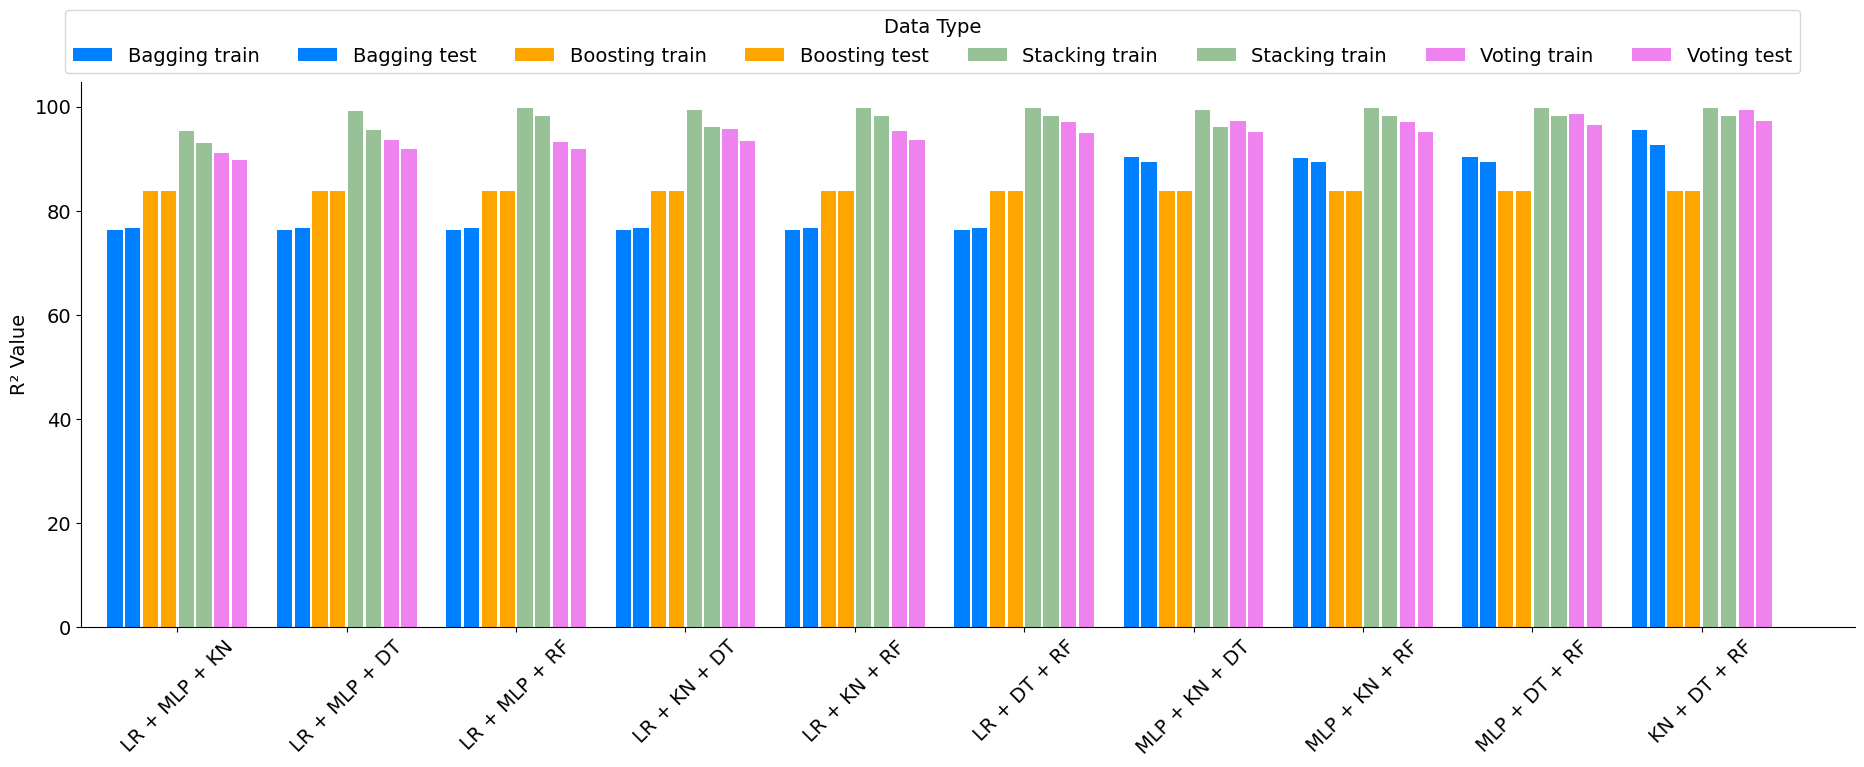

In [17]:
# Extract only the R² values for Train/Test
r2_data = np.array([dataset2['R²'][i] for i in range(len(dataset2['R²'])) if dataset2['Phase'][i] in ['Train', 'Test']])

plt.rcParams.update({'font.size': 14, 'text.color': 'black', 'axes.labelcolor': 'black', 'xtick.color': 'black', 'ytick.color': 'black'})

# Create a single graph for R²
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the bar graph for R²
for i, model_type in enumerate(types2):
    ax.bar(x + i * (width + bar_gap), r2_data[i::len(types2)], width, label=model_type, color=colors[i])

# Labeling the graph
# ax.set_xlabel('Models')
ax.set_ylabel('R² Value')
# ax.set_title('R²')

# Set x-ticks and labels
ax.set_xticks(x + (width + bar_gap) * (len(types2) - 1) / 2)
ax.set_xticklabels(model_comb, rotation=45)

# Set max value for the y-axis and add gridlines
# max_value = int(r2_data.max()) + 1

# for y in range(0, max_value, 1):
#     ax.axhline(y=y, color='gray', linestyle='--', linewidth=0.7)

# Customizing the plot
# ax.legend(title='Data Type', loc='upper center', bbox_to_anchor=(0.6, 1.09), ncol=8)
# Shifting the legend 10 pixels to the left (approximation)
ax.legend(title='Data Type', loc='upper center', bbox_to_anchor=(0.48, 1.15), ncol=8, bbox_transform=ax.transAxes)


ax.set_xlim(left=-0.2)




ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Tight layout and show plot
fig.tight_layout()
plt.show()

***loop of matrix error***

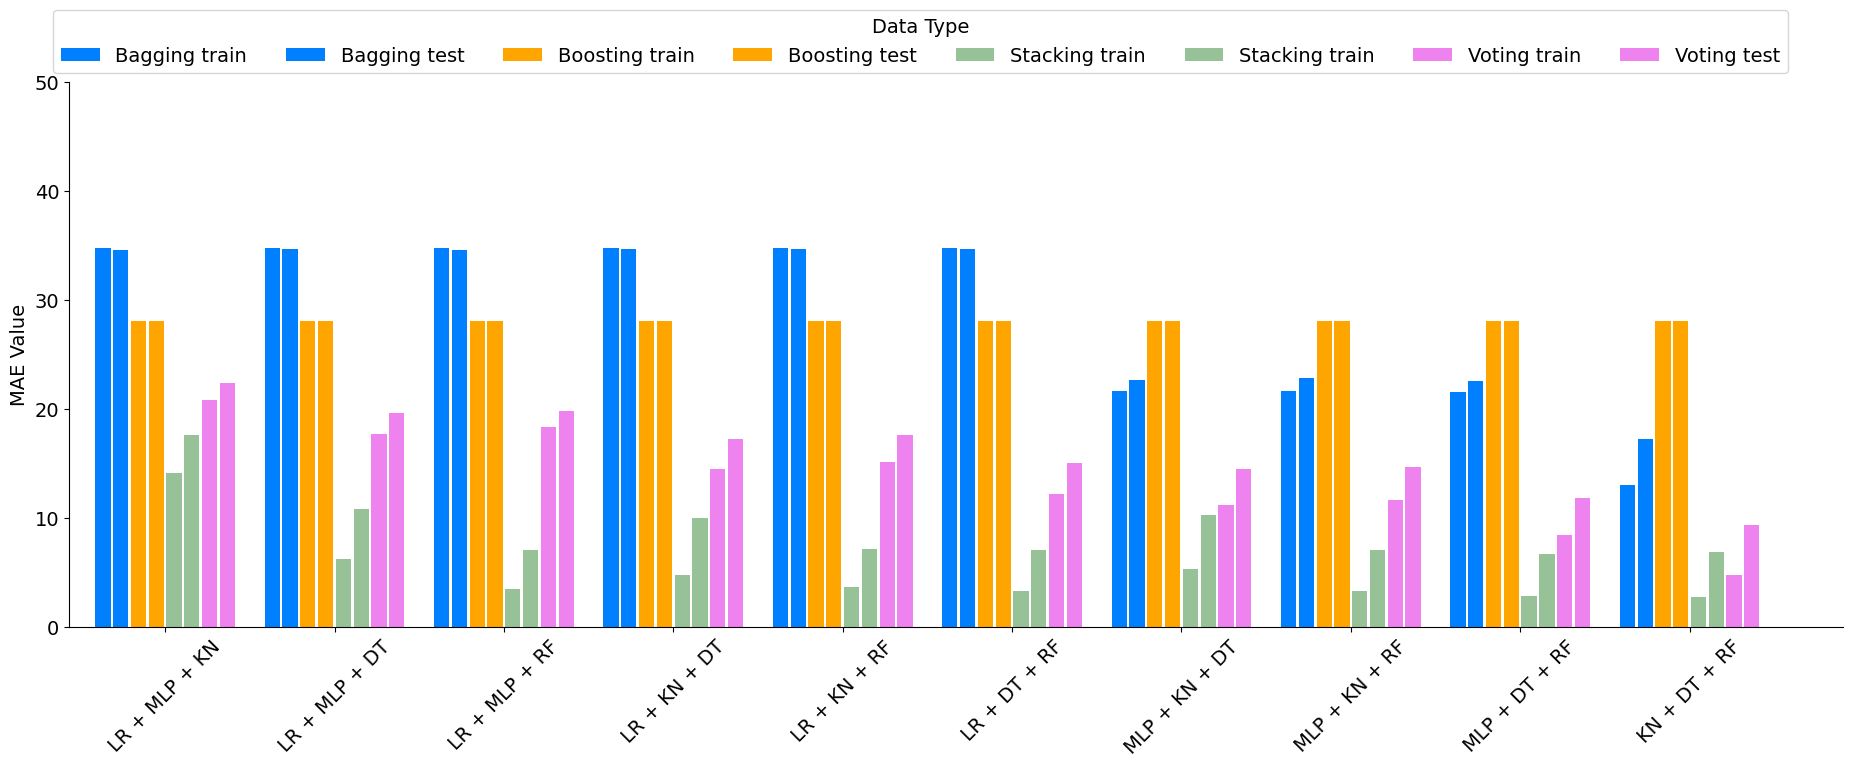

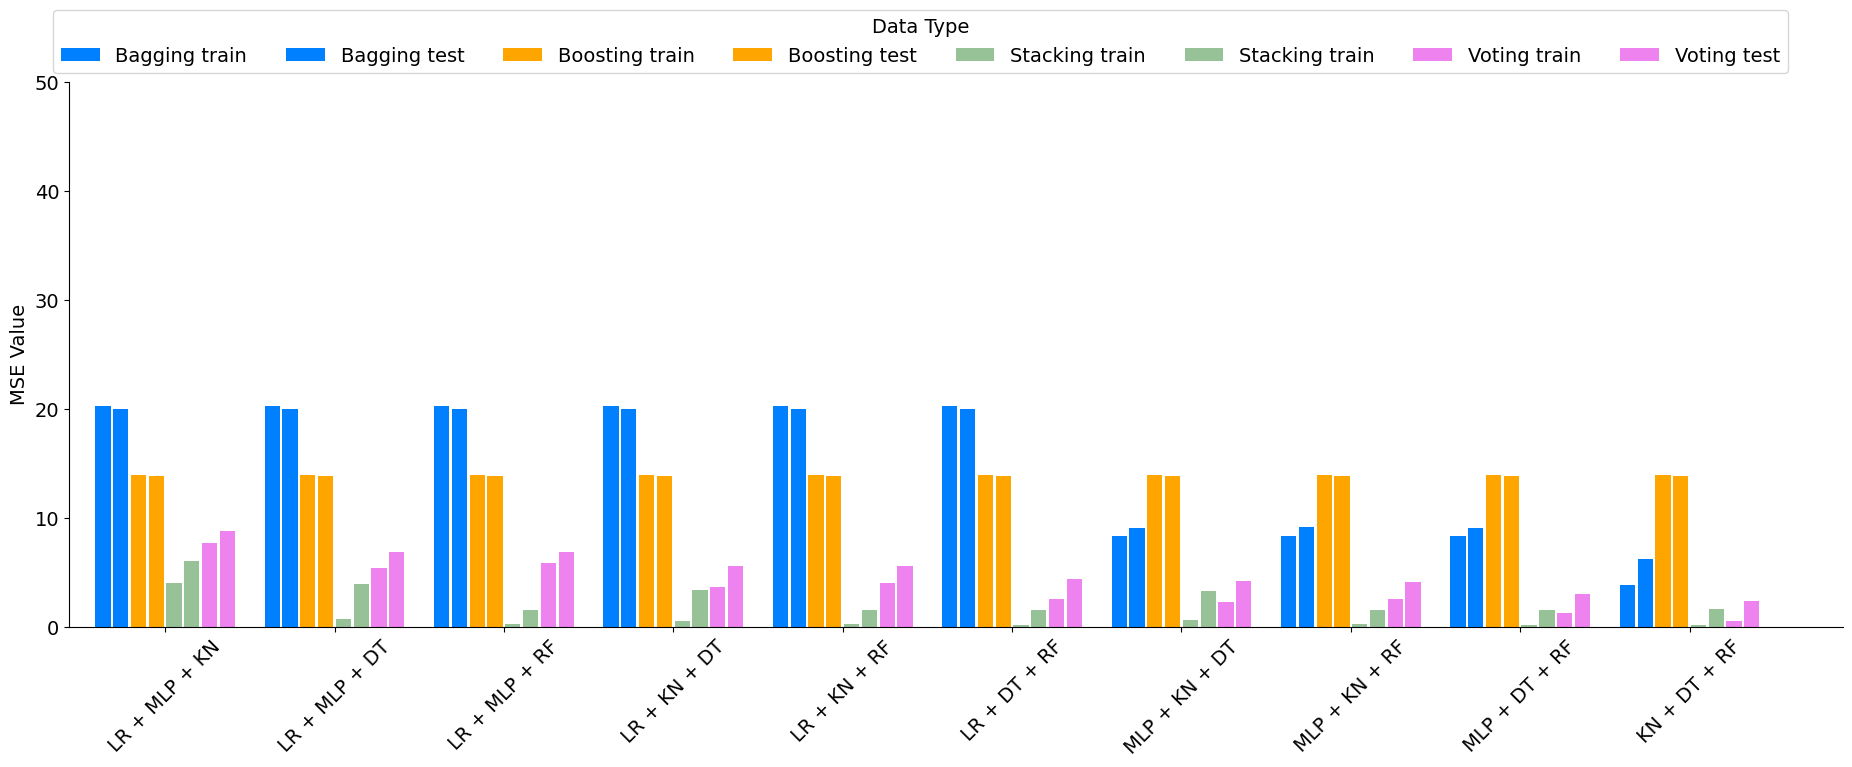

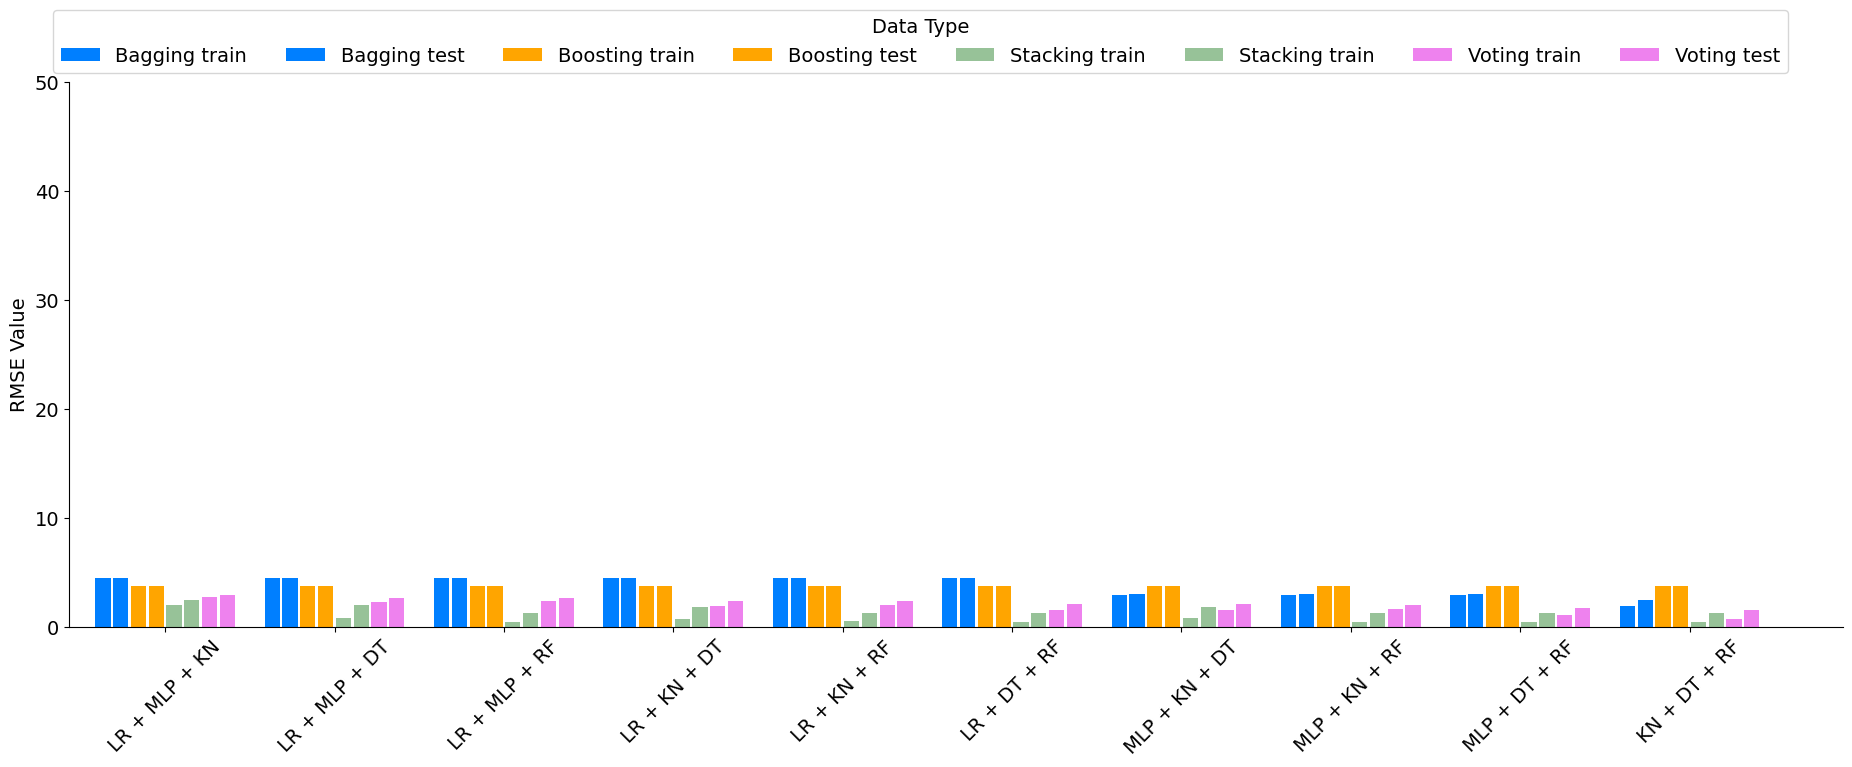

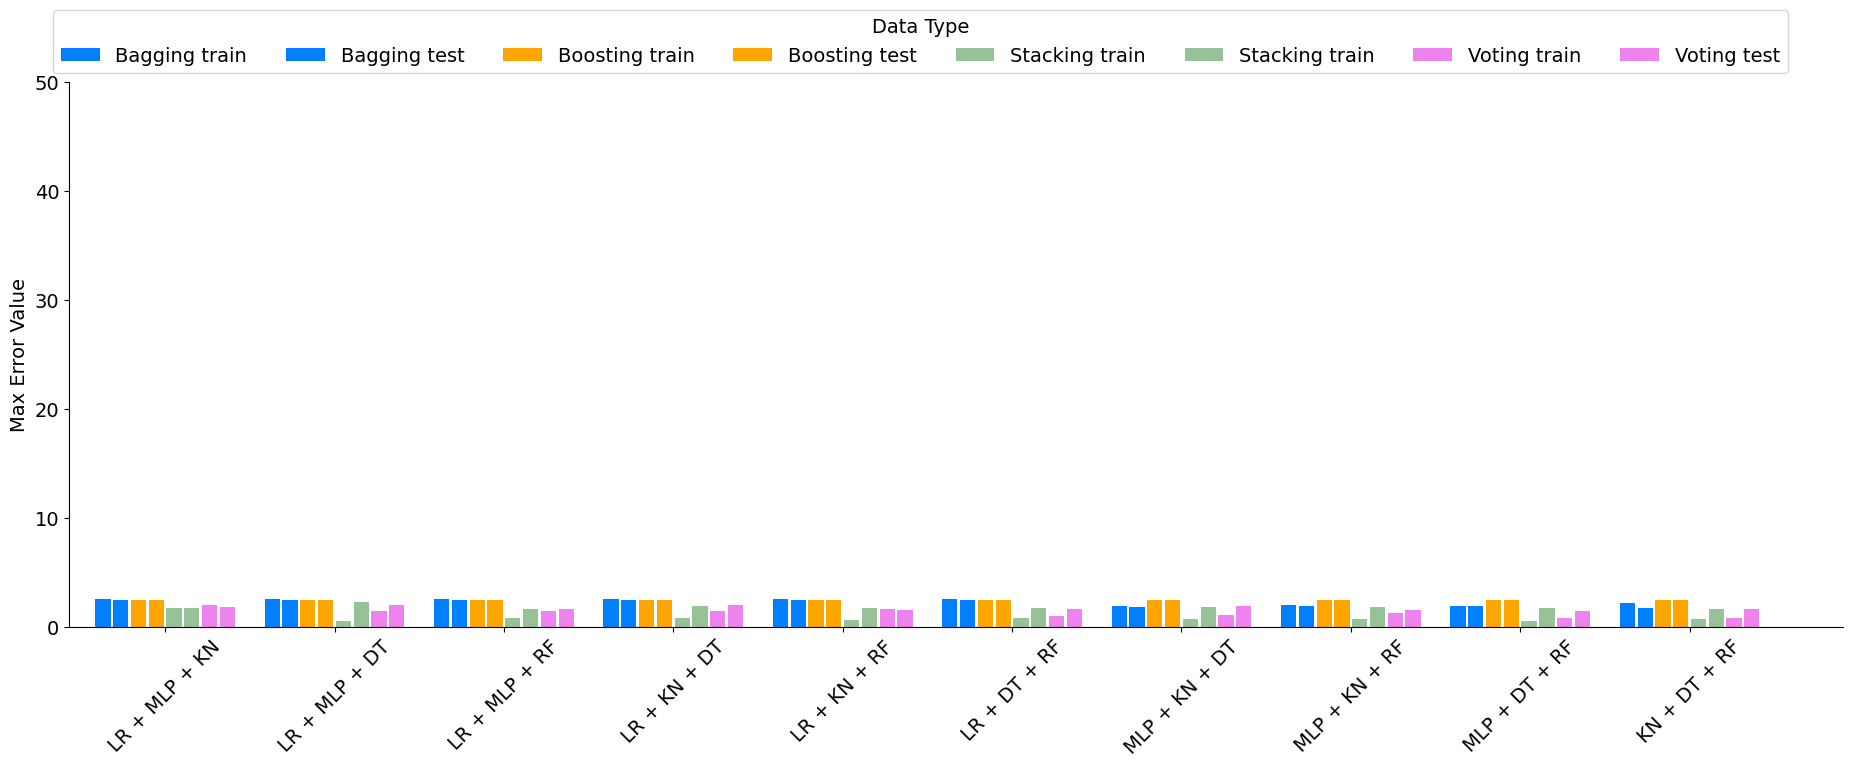

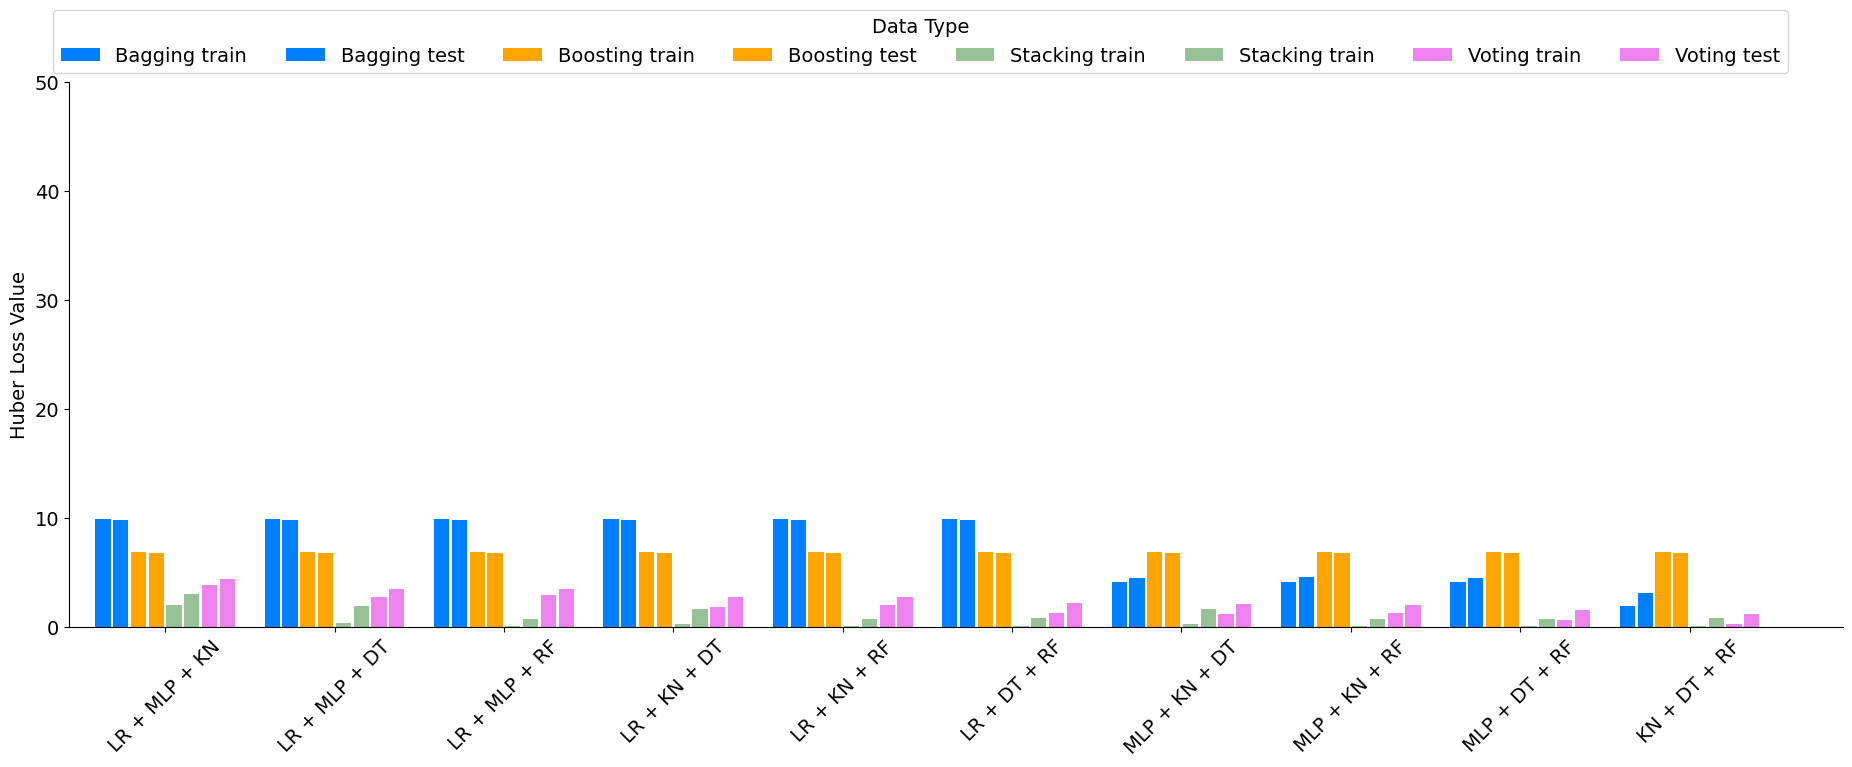

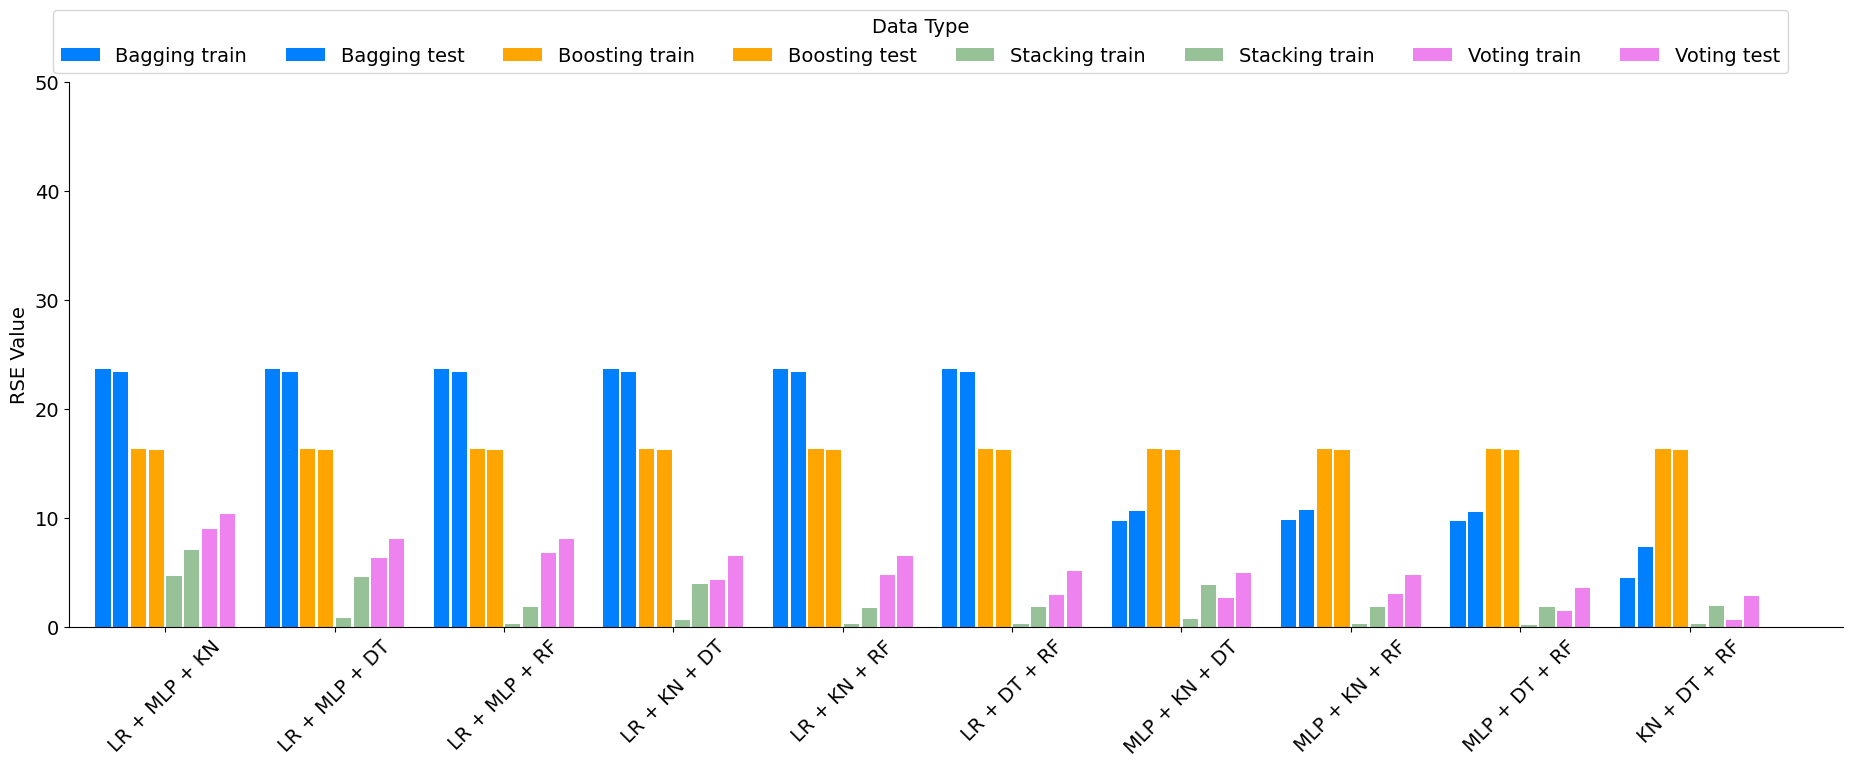

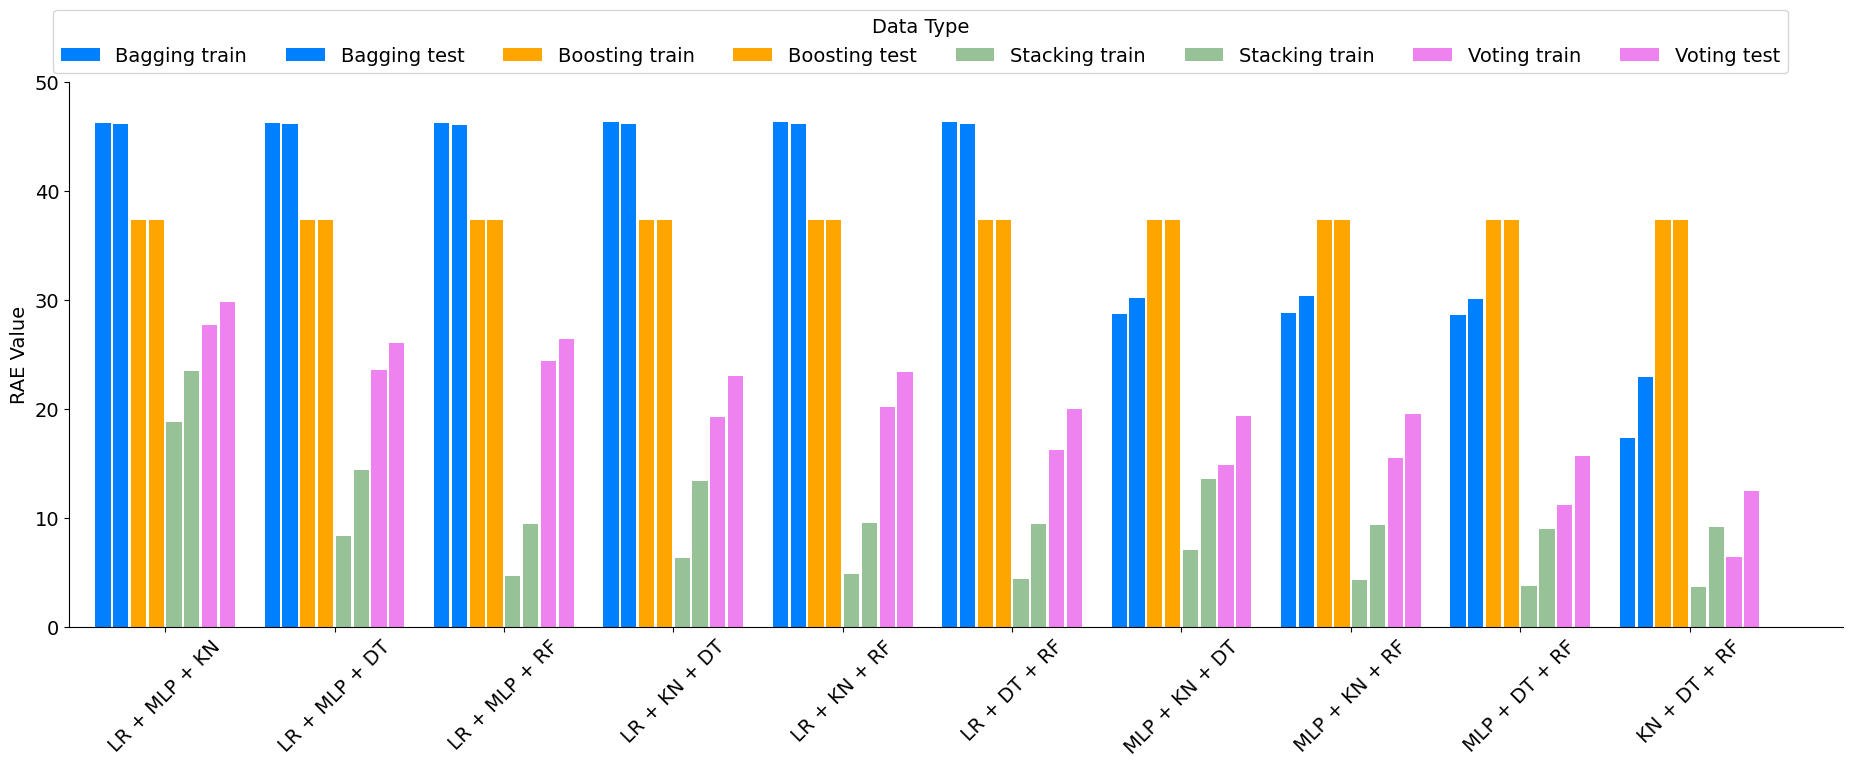

In [18]:
metrics = ['MAE', 'MSE', 'RMSE', 'Max Error', 'Huber Loss', 'RSE', 'RAE']
y_labels = ['MAE Value', 'MSE Value', 'RMSE Value', 'Max Error Value', 'Huber Loss Value', 'RSE Value', 'RAE Value']
titles = metrics

for metric, y_label, title in zip(metrics, y_labels, titles):

    plt.rcParams.update({'font.size': 14, 'text.color': 'black', 'axes.labelcolor': 'black', 'xtick.color': 'black', 'ytick.color': 'black'})

    model_data = dataset2[dataset2[metric].notnull() & (dataset2['Phase'].isin(['Train', 'Test']))][metric].values

    fig, ax = plt.subplots(1, figsize=(20, 8), sharey=True)

    for i, model_type in enumerate(types2):
        ax.bar(x + i * (width + bar_gap), model_data[i::len(types2)], width, label=model_type, color=colors[i])

    # ax.set_xlabel('Models')
    ax.set_ylabel(y_label)
    # ax.set_title(title)

    ax.set_xticks(x + (width + bar_gap) * (len(types2) - 1) / 2)
    ax.set_xticklabels(model_comb, rotation=45)

    # max_value = int(max(train_values.max(), test_values.max())) + 10
    # for y in range(0, max_value, 10):
    #     ax.axhline(y=y, color='gray', linestyle='--', linewidth=0.7)

    ax.set_ylim(top=50)

    # ax.legend(title='Data Type', loc='upper left', bbox_to_anchor=(0.6, 1.09), ncol=4)
    ax.legend(title='Data Type', loc='upper center', bbox_to_anchor=(0.48, 1.15), ncol=8, bbox_transform=ax.transAxes)


    ax.set_xlim(left=-0.2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['left'].set_visible(False)

    fig.tight_layout()
    plt.show()


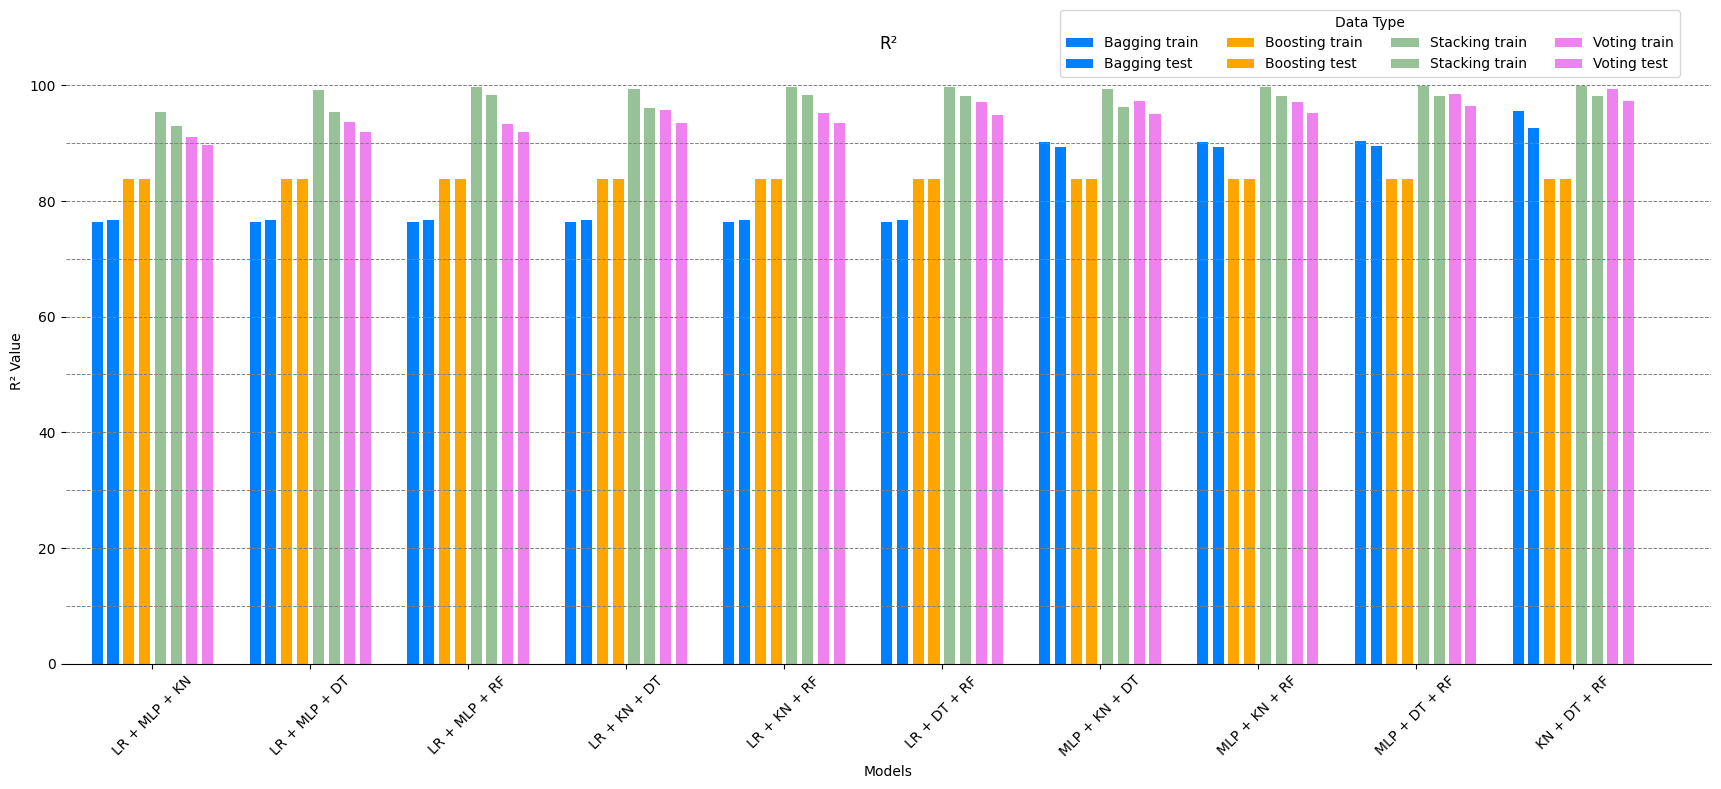

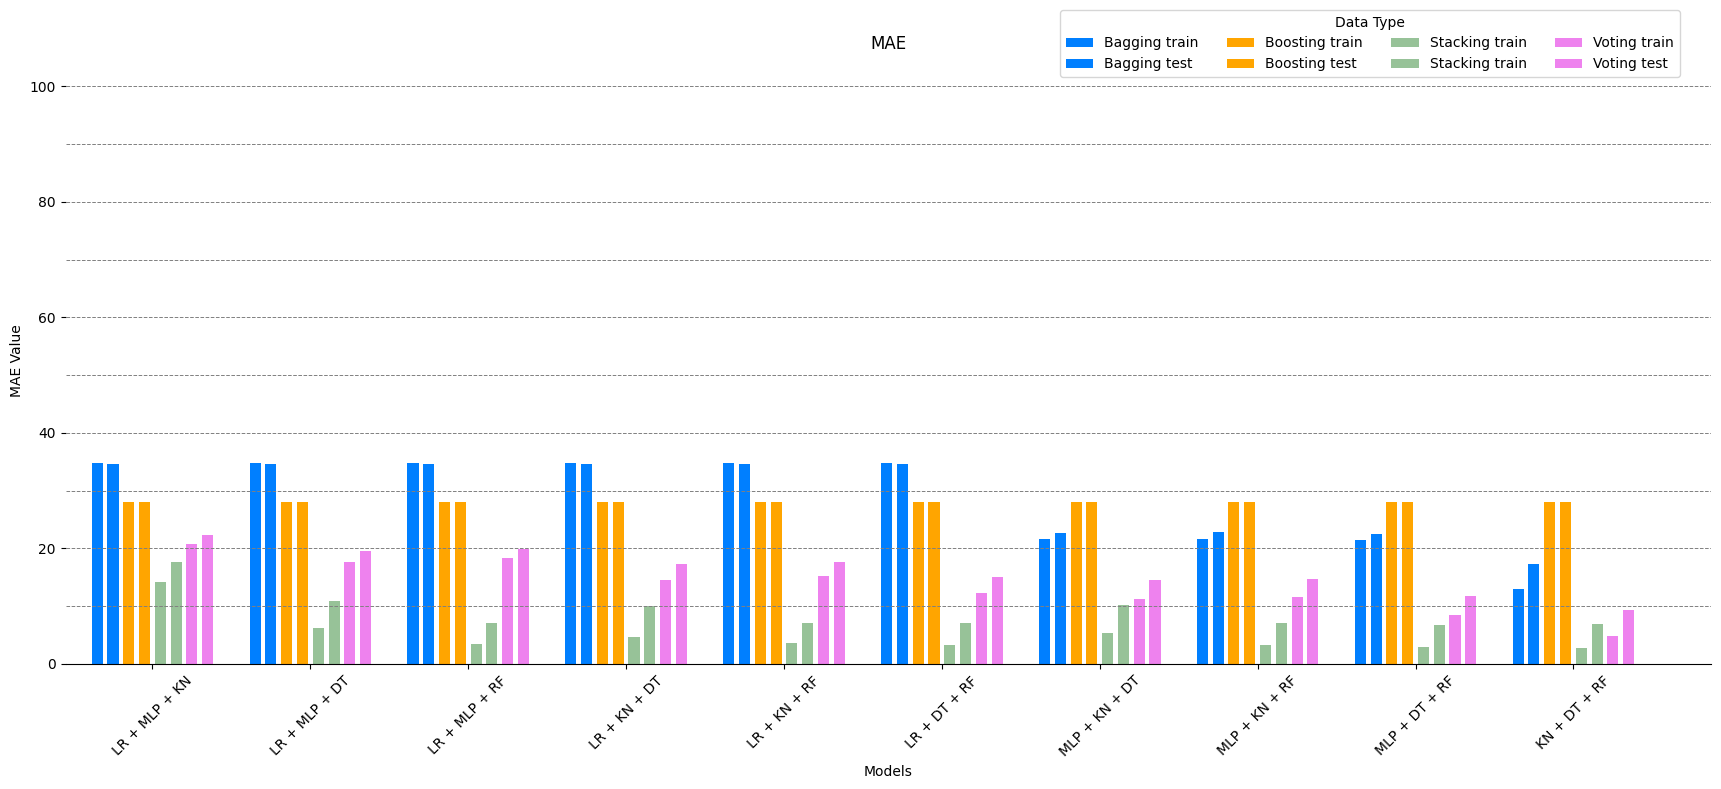

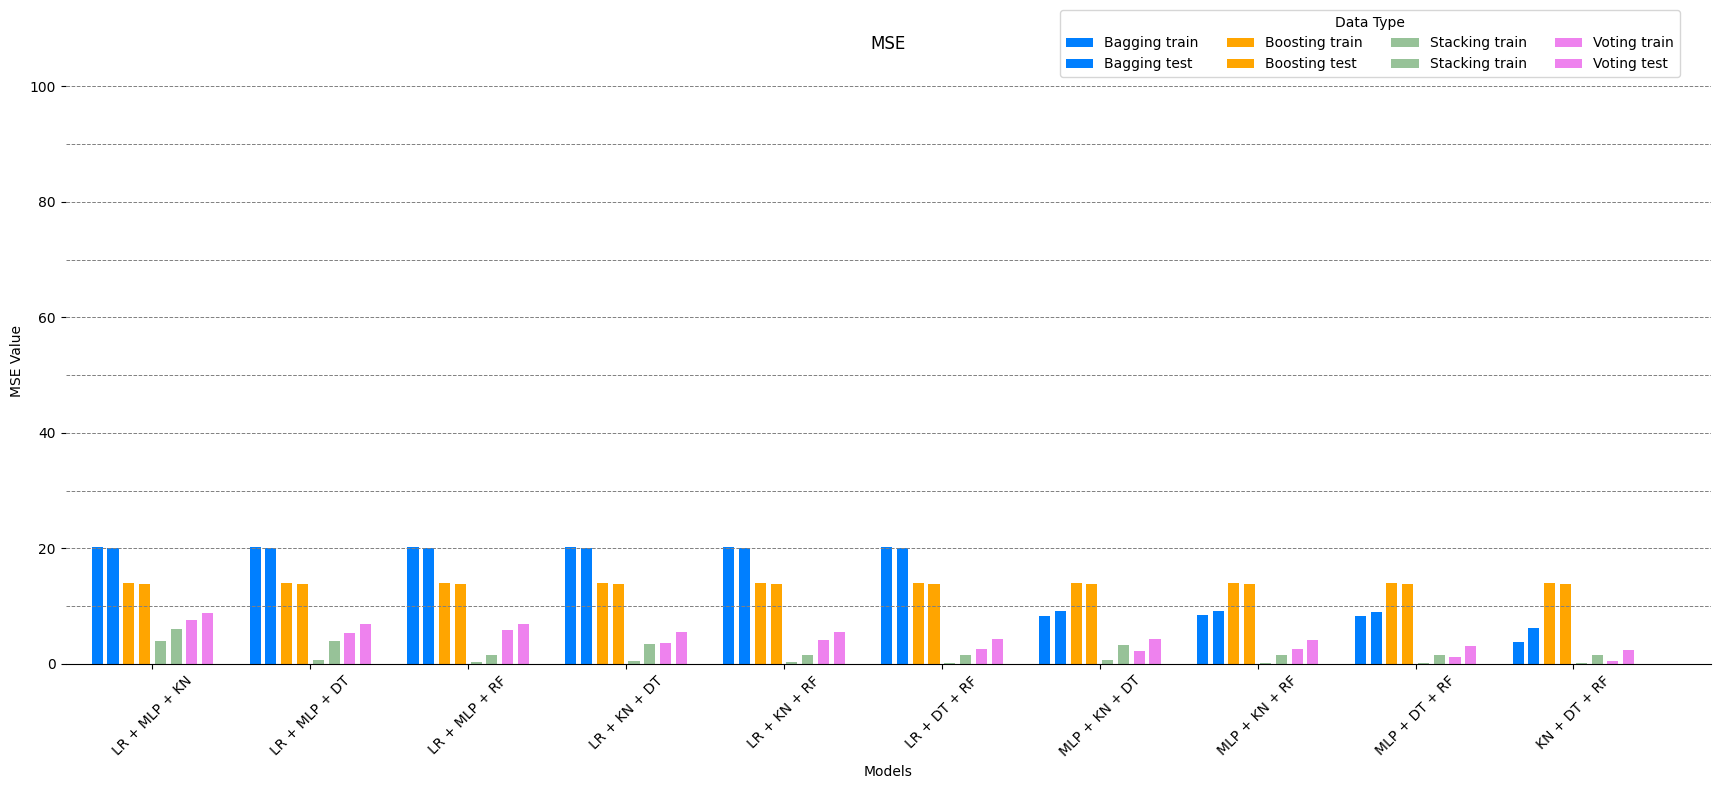

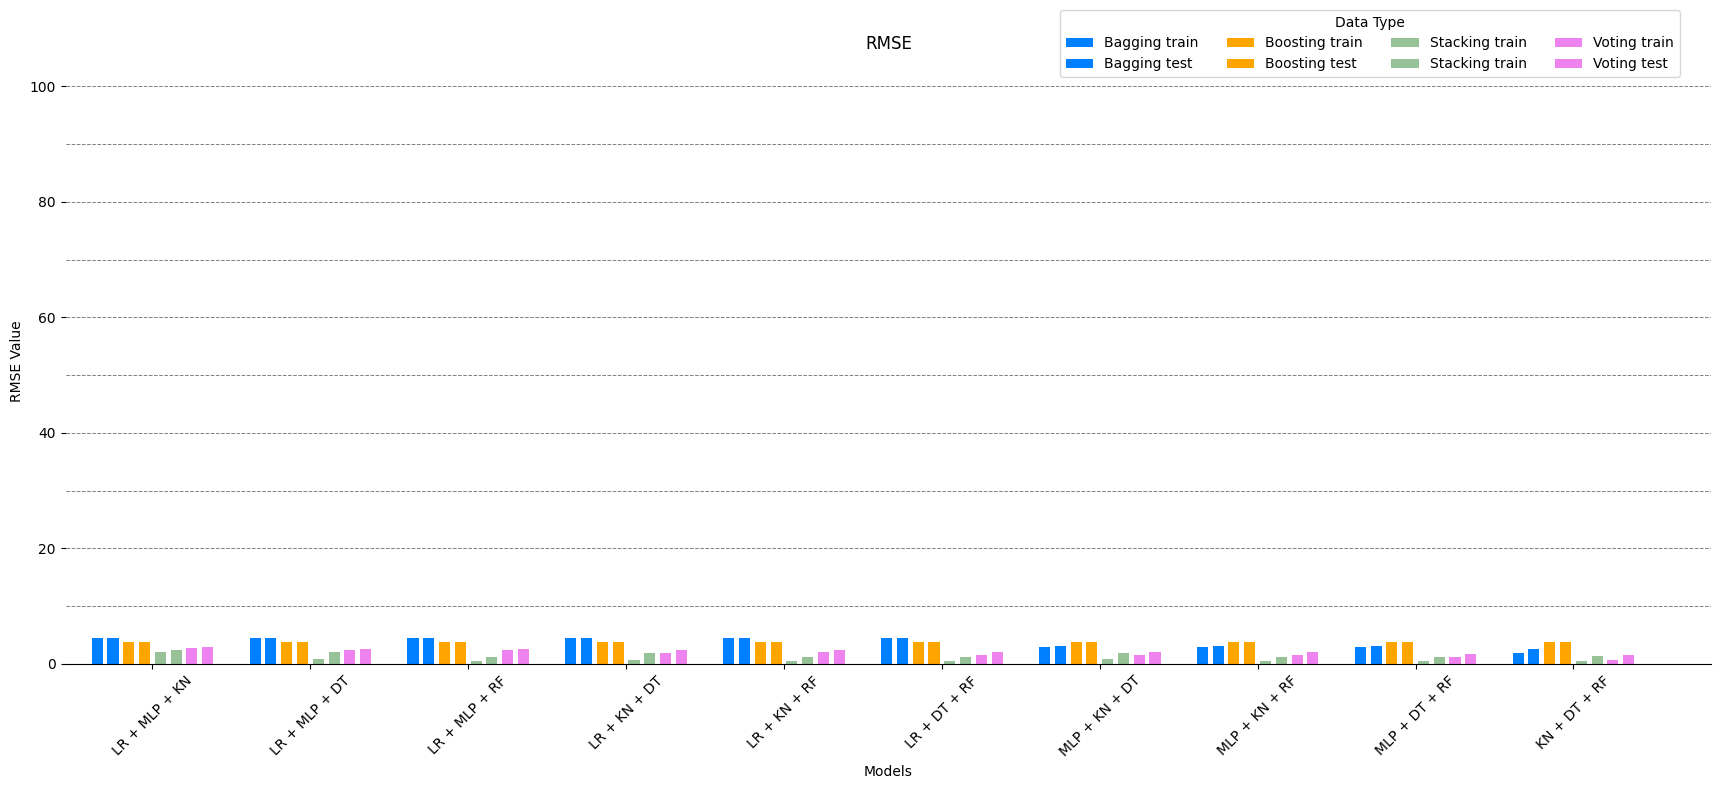

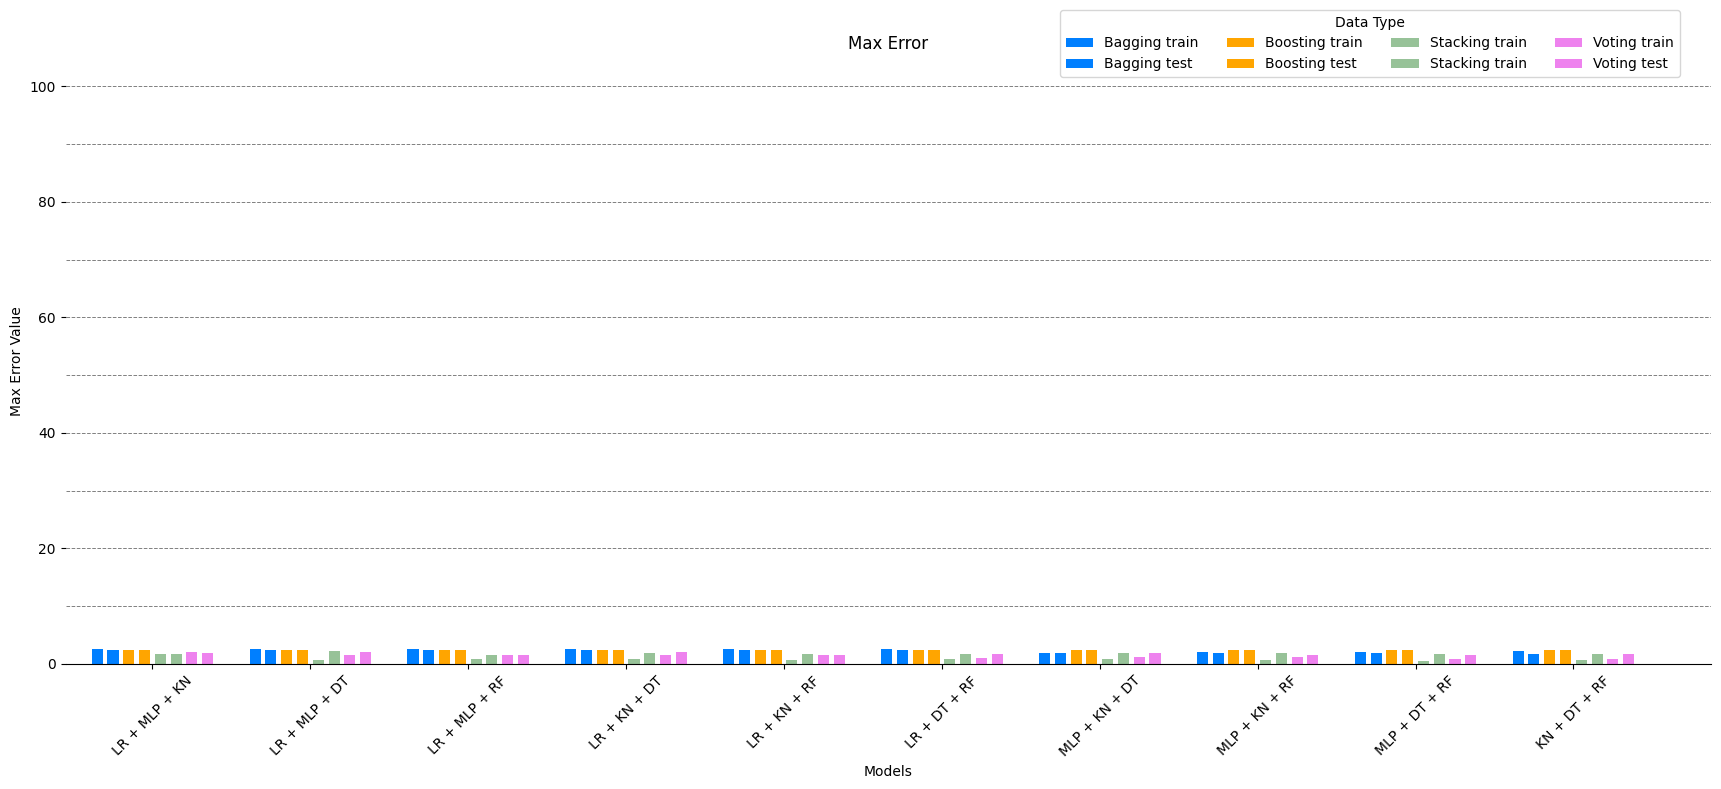

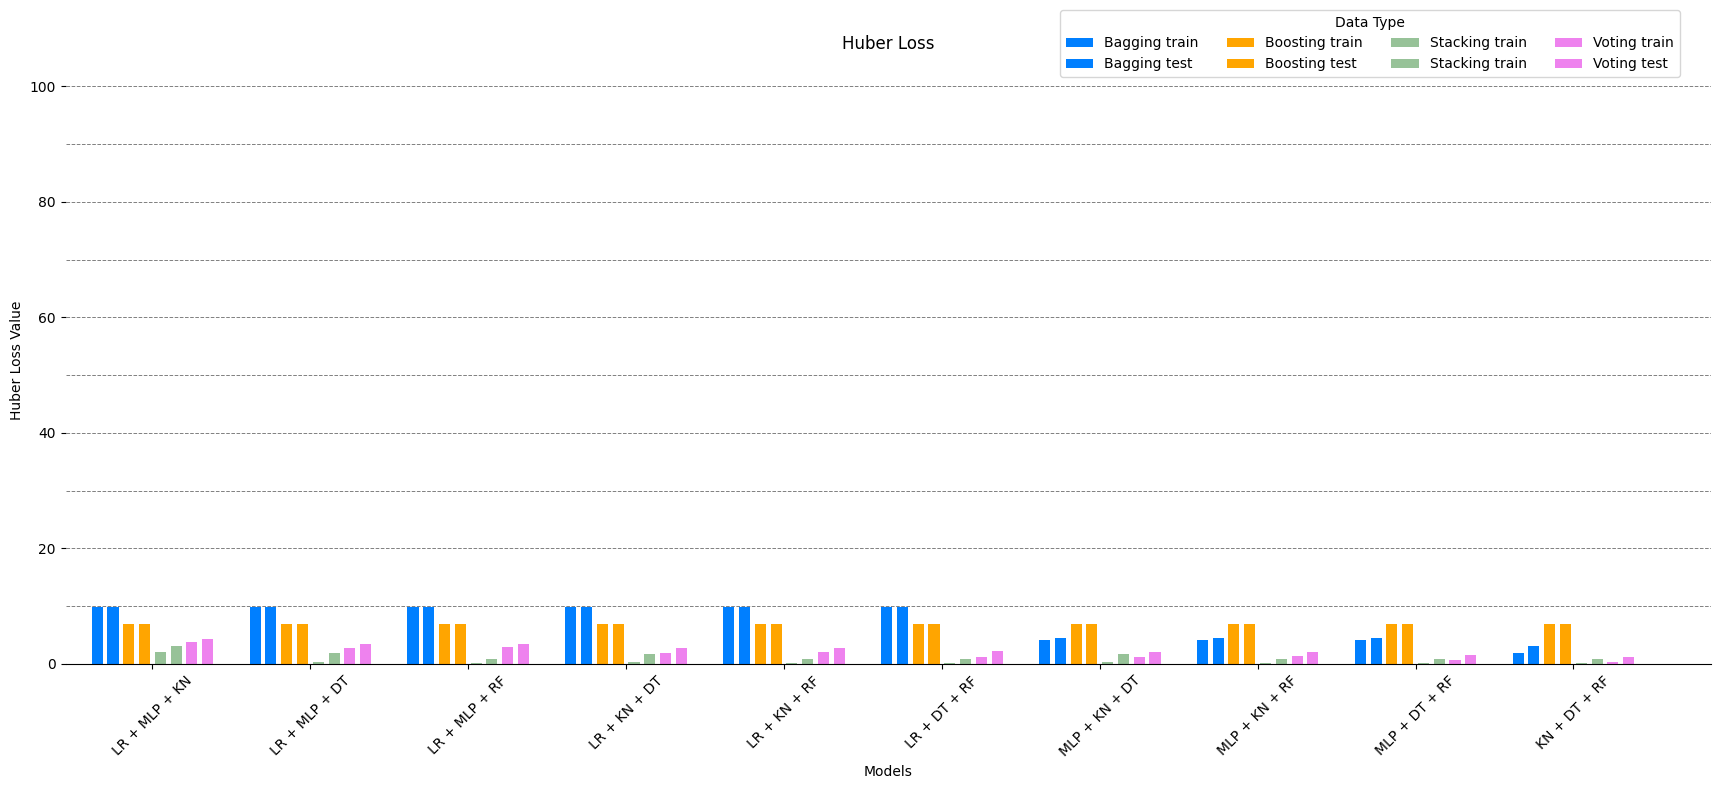

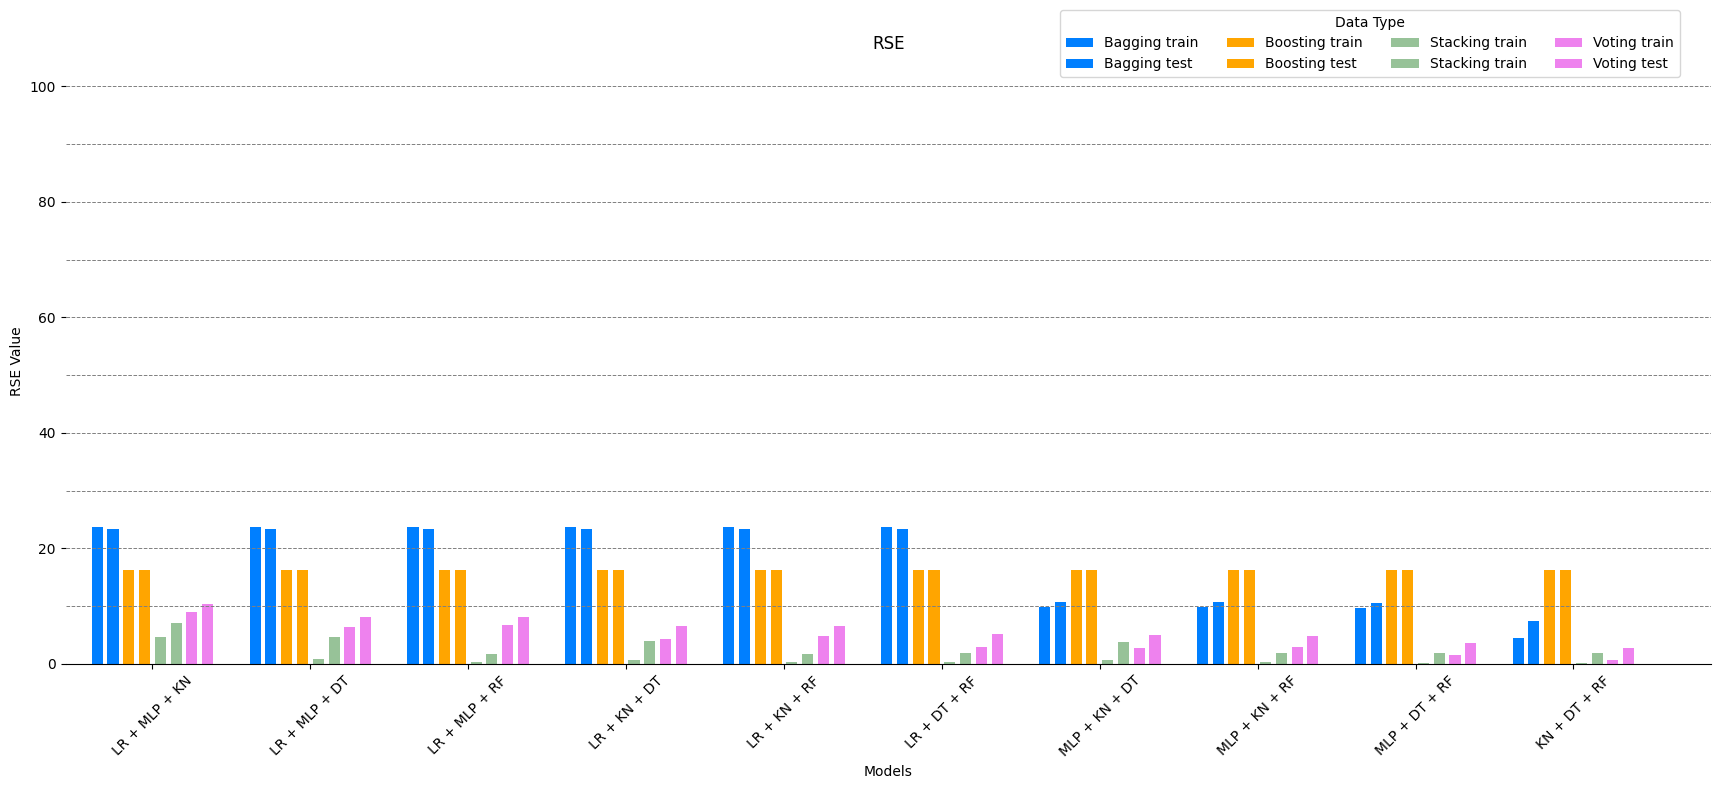

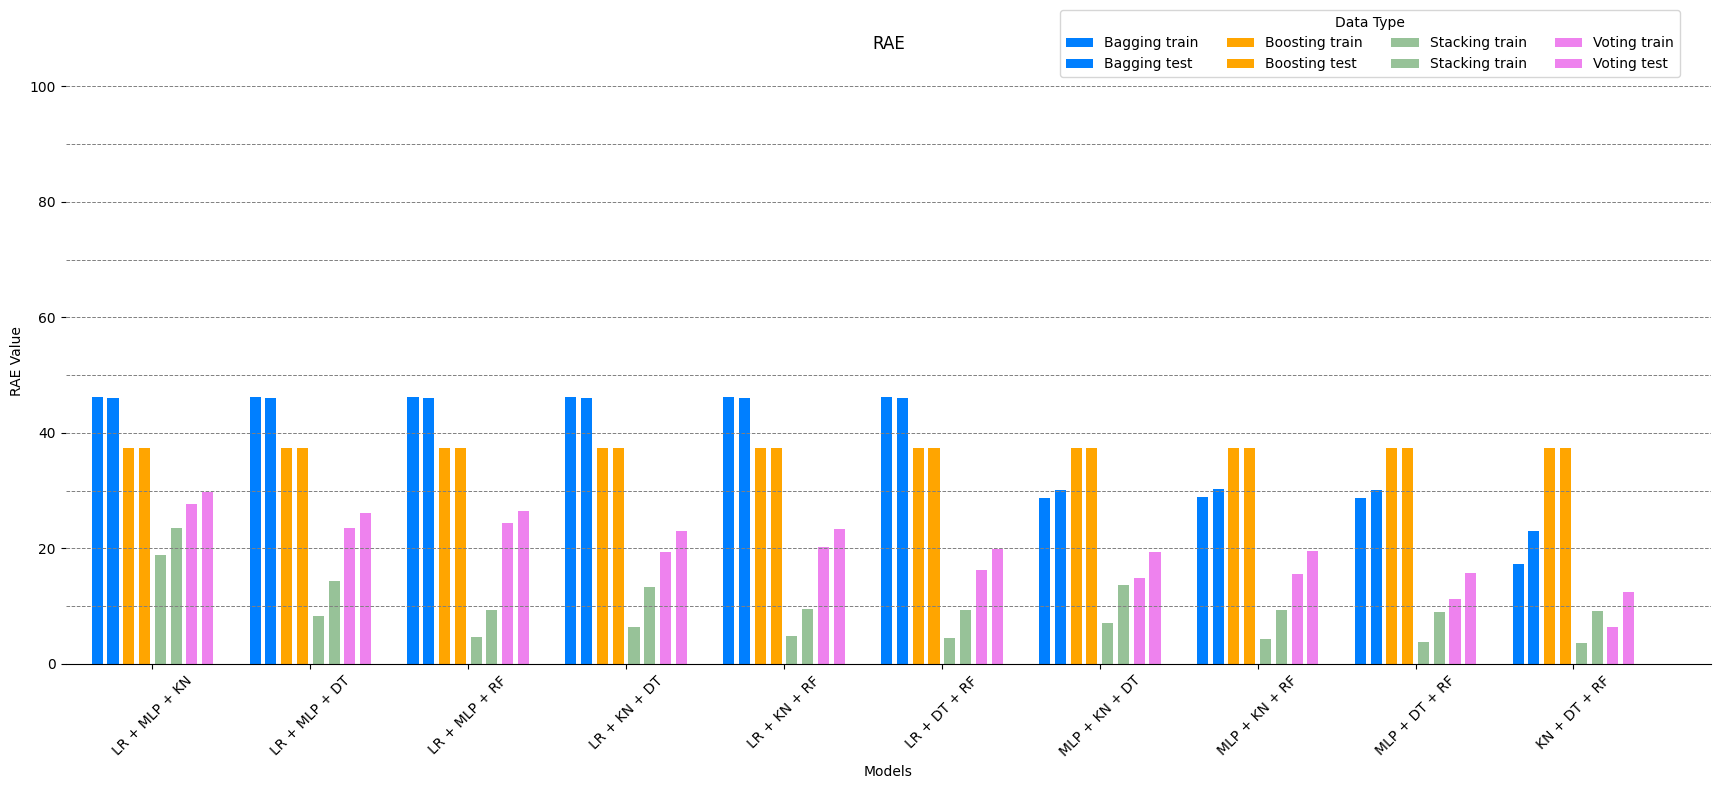

In [23]:
metrics = ['R²', 'MAE', 'MSE', 'RMSE', 'Max Error', 'Huber Loss', 'RSE', 'RAE']
y_labels = ['R² Value', 'MAE Value', 'MSE Value', 'RMSE Value', 'Max Error Value', 'Huber Loss Value', 'RSE Value', 'RAE Value']
titles = metrics

for metric, y_label, title in zip(metrics, y_labels, titles):

    model_data = dataset2[dataset2[metric].notnull() & (dataset2['Phase'].isin(['Train', 'Test']))][metric].values

    fig, ax = plt.subplots(1, figsize=(18, 8), sharey=True)

    for i, model_type in enumerate(types2):
        ax.bar(x + i * (width + bar_gap), model_data[i::len(types2)], width, label=model_type, color=colors[i])

    ax.set_xlabel('Models')
    ax.set_ylabel(y_label)
    ax.set_title(title)

    ax.set_xticks(x + (width + bar_gap) * (len(types2) - 1) / 2)
    ax.set_xticklabels(model_comb, rotation=45)

    max_value = int(max(train_values.max(), test_values.max())) + 10
    for y in range(0, max_value, 10):
        ax.axhline(y=y, color='gray', linestyle='--', linewidth=0.7)

    ax.legend(title='Data Type', loc='upper left', bbox_to_anchor=(0.6, 1.09), ncol=4)
    ax.set_xlim(left=-0.2)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    fig.tight_layout()
    plt.show()
